# Homework 2: Ordinary Differential Equations

### Bayu Wilson

#### Professor Tom Quinn
Due April 25



# (1) Write numerical ODE integrator 

Write a program to integrate up to **four** sets of coupled differential equations using the Euler method, fourth-order Runge-Kutta, and Leapfrog.

Euler Method is essentially lowest order.

$$ \frac{dy}{dt}=f(y_i,t_i) = \frac{y_{i+1}-y_i}{h}+O(h) $$

$$ y_{i+1}=y_i + h f(y_i,t_i)+O(h^2) $$

### Euler method
$$y_{n+1}=y_{n}+hf(t_{n},y_{n})$$

It should solve this kind of equation:

$$\frac{d^2x}{dt^2} + B \frac{dx}{dt} + Cx = D(t)$$

$$ y[0] = x $$
$$ y[1] = v $$
$$ dydt[0] = v $$
$$ dydt[1] = dv/dt $$

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
def null_func(t,y): 
    # a placeholder function with two dependent variables. Used in Euler method if there is a more complicated ODE.
    return 0
def euler_method(f_t=null_func,A=-1,B=0,C=0,ti=0,tf=30,dt=0.1,w0=0,z0=1):
    """
    What I used as reference:
    https://math.oregonstate.edu/home/programs/undergrad/CalculusQuestStudyGuides/ode/second/so_num/so_num.html
    
    Solves ODE in the form x'' + Ax' + Bx = C(t)
    w is the approximation for x' or v
    y'' =  v'
    z is the approximation for x
    f_t is C(t) part. It would be included if ODE is more complicated
    
    INPUT:
    Initial conditions of ODE and possible inhomogeneities in ODE.
    OUTPUT:
    Tuple of 2 arrays containing approximations for x and x' respectively.
    """
    t = np.arange(ti,tf,dt)
    w = np.zeros_like(t)
    z = np.zeros_like(t)
    w[0]=w0 # Initial value for w (x')
    z[0]=z0 # Initial value for z (x)
    for k in range(len(t)-1): # Euler's method in action.
        z[k+1] = z[k] + dt * w[k] 
        w[k+1] = w[k] + dt*(A*z[k]+B*w[k]+C*f_t(t[k],z[k]))
    return z,w
def f_2(t,y,B=0,C=1,D=0):
    """
    ODE function to be used for for Runge-kutta method. Different than previous because I don't understand
    scipy implementation.
    
    INPUT:
    Initial conditions of ODE and y (list containing y and y') and t the independent variable.
    OUTPUT:
    Array containing x' and x'' (or v and v') respectively.
    """
    dydt = np.zeros(2)
    dydt[0] = y[1]
    dydt[1] = -B*y[1] - C*y[0] + D
    return dydt
def runge_kutta(function,x0 = 1, v0 = 0, t0 = 0,dt = 0.1,tf = 30):
    """
    Scipy's method for integrating ODE using runge-kutta method.
    
    INPUT:
    Initial conditions of ODE and function in the form of `f_2`
    OUTPUT:
    List containing the approximations for y
    """
    solver = ode(function).set_integrator('dopri5',atol=1.0,rtol=1.0,nsteps=10) # want dopri5 integrator
    solver.set_initial_value([x0,v0],t0) # giving initial values
    mylist = []
    while solver.t<tf: # solver.t starts with t0 and updates time each loop
        solver.integrate(solver.t+dt)
        mylist.append(solver.y[0]) # saving data to list so we can view
    return mylist
def leapfrog(F,h=0.5,x0=1,v0=0,ti=0,tf=30):
    """
    Manual implementation of leap frog algorithm.
    
    INPUT:
    Initial conditions of ODE and function, `F`, with one independent variable. i.e. `lambda x: -x`
    OUTPUT:
    Tuple of two arrays the contain x and x' approximation using this method
    """
    t = np.arange(ti,tf,dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    v[0],x[0] = v0,x0
    for n in range(len(t)-1):
        vhalf = v[n] + 1/2*h*F(x[n])
        x[n+1] = x[n] + h*vhalf
        v[n+1] = vhalf + 1/2*h*F(x[n+1])
    return x,v

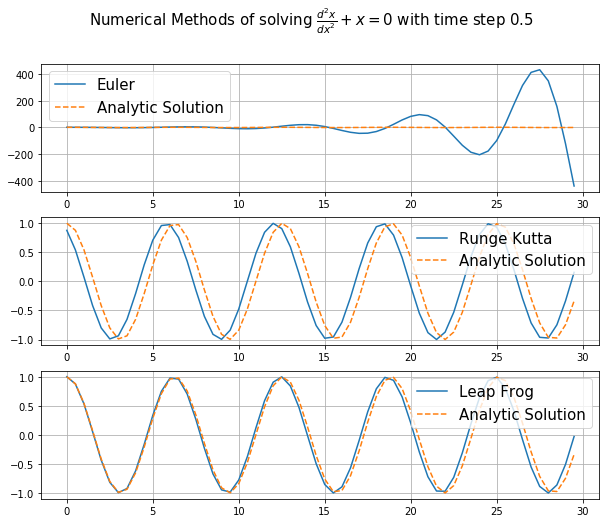

In [13]:
fig,ax = plt.subplots(3,1)
fig.set_size_inches(10,8)
ti,tf,dt = 0,30,0.5
t = np.arange(ti,tf,dt)
analytic_soln = np.cos(t)
plt.suptitle(r'Numerical Methods of solving $\frac{d^2x}{dx^2}+x = 0$ with time step '+str(dt), fontsize=15)
ax[0].plot(t,euler_method(f_t=lambda x,t:0,dt=dt)[0],label='Euler')
ax[1].plot(t,runge_kutta(function=f_2,dt=dt),label='Runge Kutta')
ax[2].plot(t,leapfrog(F=lambda x: -x,h=dt)[0],label='Leap Frog')
for i in ax:
    i.grid()
    i.plot(t,analytic_soln,'--', label='Analytic Solution')
    i.legend(loc='best', fontsize = 15);

In [55]:


def ode_function(t,y,yprime,B=0,C=1,D=0):
    dydt = np.zeros(2)
    dydt[0] = yprime # v
    dydt[1] = -B*yprime - C*y + D*np.cos(t) # dvdt
    return dydt

def euler_method(f, x0=0, xf=30, y0=0, yi1=0, h=0.1):
    n = int((xf-x0)/h)
    x = x0
    y = y0
    y1 = yi1
    for i in range(n):
        y1 += h*f(x,y,y1) #f(x, y, y1)
        y += h*y1
        x += h
    return y
#euler_method(f=ode_function)
#ode_function(1,1,1)

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

def ode_function(t,y,B=0,C=1,D=0):
    dydt = np.zeros(2)
    dydt[0] = y[1] # v
    dydt[1] = -B*y[1] - C*y[0] + D*np.cos(t) # dvdt
    return dydt
def euler_method(f, x0=0, xf=30, y0=0, yi1=0, h=0.1):
    #h = (xf - x0) / float(n)
    n = int((xf-x0)/h)
    x = x0
    y = y0
    y1 = yi1
    for i in range(n):
        print(y,y1)
        y1 += h * f(x,[y,y1]) #f(x, y, y1)
        y += h * y1
        x += h
    return y

# def euler_method(function,x0=0,y0=0,xf=10,n=101):
#     dx = (xf-x0)/(n-1)
#     x = np.linspace(x0,xf,n)
#     y = np.zeros([n])
#     y0 = y[0]
#     for i in range(n):
#         y[i] = dx*(function(x[i-1]))+y[i-1]
#     return y

def runge_kutta(function,x0 = 0, v0 = 0, t0 = 0,dt = 0.1,tf = 1):
    solver = ode(function).set_integrator('dopri5',atol=1.0,rtol=1.0,nsteps=10)
    solver.set_initial_value([x0,v0],t0)
    adict = {'a':[],'b':[]}
    while solver.t<tf: # solver.t starts with t0 and updates time each loop
        solver.integrate(solver.t+dt)
        adict['a'].append(solver.y[0])
        adict['b'].append(solver.y[1])
    return adict
    #print(solver.t,solver.y)

def analytic_solution(dt,ti=0,tf=30):
    t = np.arange(0,30,dt)
    return np.cos(t)

In [60]:
#plt.plot(euler_method(function=np.sin))
#plt.plot(runge_kutta(np.cos))
#plt.plot(runge_kutta(np.cos,tf=10)['a'])
plt.plot(euler_method(f=ode_function))

0 0
[0. 0.] [0. 0.]


ValueError: setting an array element with a sequence.

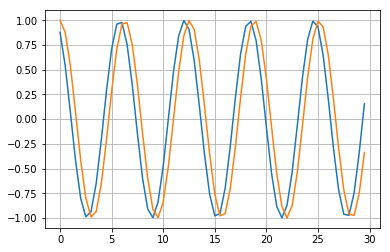

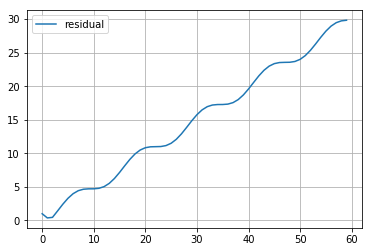

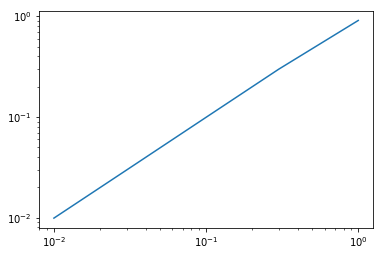

In [61]:
dt = 0.5
t = np.arange(0,30,dt)
step_sizes = [1.0,0.3,0.1,0.03,0.01]
x = runge_kutta(f,x0=1,dt=dt,tf=30)
#plt.plot(t,x['b'],label = 'b')
plt.grid()
plt.plot(t,x['a'],label='a')
plt.plot(t,analytic_solution(dt))
plt.show()
plt.grid()
plt.plot(np.abs(t-analytic_solution(dt)), label='residual')
plt.legend(loc='best')
plt.show()
x_analytic = np.array([analytic_solution(i)[-1] for i in step_sizes])
x_numeric =  np.array([runge_kutta(f,x0=1,dt=i,tf=30)['a'][-1] for i in step_sizes])
plt.loglog(step_sizes,np.abs(x_numeric-x_analytic))
plt.show();

In [ ]:
def potential(x,y):
    phi = -1/np.sqrt(1+x**2+x**2)
    return phi


# Attempt April 25th

$$ y' = Ay + B $$

$$ y_{n+1}=y_n+hf(t_n,y_n) $$

$$y'' = -y'+sin(ty),y(0)=1,y'(0)=2$$

$$ y'=v,v'=-v+sin(ty) $$

$$ z_{k+1}=z_k + \Delta t w_k $$

$$ w_{k+1}=w_k + \Delta t \{-w_k + sin(t_kz_k)\}  $$

In [262]:
A=-1
B=0
C=0
def euler_method(A=A,B=B,C=C,ti=0,tf=30,dt=0.1,w0=0,z0=1):
    # w is the approximation for x' or v
    # y'' =  v'
    # z is the approximation for x
    t = np.arange(ti,tf,dt)
    w = np.zeros_like(t)
    z = np.zeros_like(t)
    w[0]=w0 # Initial value for w (x')
    z[0]=z0 # Initial value for z (x)
    for k in range(len(t)-1):
        z[k+1] = z[k] + dt * w[k]
        w[k+1] = w[k] + dt*(A*z[k]+B*w[k]+C)
    return z,w

def runge_kutta(function,x0 = 1, v0 = 0, t0 = 0,dt = 0.1,tf = 1):
    solver = ode(function).set_integrator('dopri5',atol=1.0,rtol=1.0,nsteps=10)
    solver.set_initial_value([x0,v0],t0)
    #adict = {'a':[],'b':[]}
    mylist = []
    while solver.t<tf: # solver.t starts with t0 and updates time each loop
        solver.integrate(solver.t+dt)
        mylist.append(solver.y[0])
    return mylist

def f(t,y,B=0,C=1,D=0):
    dydt = np.zeros(2)
    dydt[0] = y[1]
    dydt[1] = -B*y[1] - C*y[0] + D*np.cos(t)
    return dydt
#solver = ode(f).set_integrator('dopri5',atol=1.0,rtol=1.0,nsteps=10)
#solver?

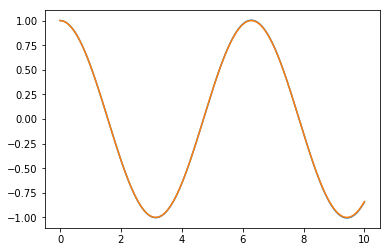

In [263]:
dt = 0.001
ti=0
tf=10
plt.plot(np.arange(ti,tf,dt),euler_method(tf=tf,dt=dt)[0])
plt.plot(np.linspace(ti,tf,100),np.cos(np.linspace(ti,tf,100)))

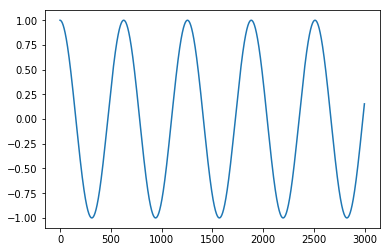

In [264]:
# runge_kutta(ode_function)
dt = 0.01
ti=0
tf=10
#plt.plot(runge_kutta(function=f,x0=1,dt=dt,tf=30)['b'])
plt.plot(runge_kutta(function=f,x0=1,dt=dt,tf=30))

# Attempt 2

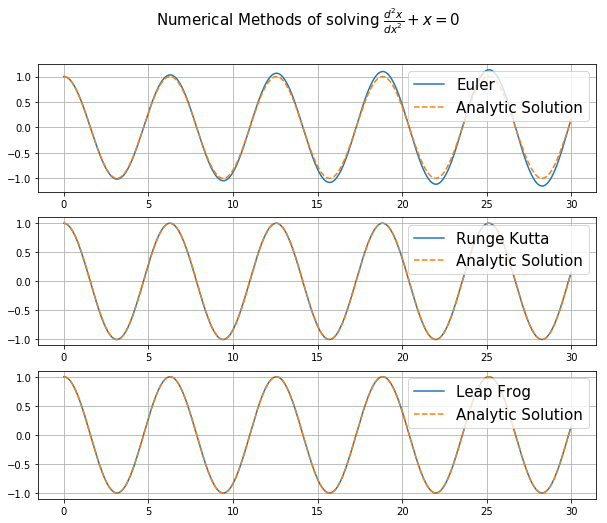

In [348]:
(lambda x,y: x**2 + 2*x - 5+y)(0,2)

-3